In [2]:
import numpy as np


#Init values
kBT = 1.380 * 10**(-23)
T = 300
eta = 1 * 10**(-3)
R = 1 * 10**(-6)
k_x = 1 * 10**(-6)
k_y = 9 * 10**(-6)


In [3]:
def harmonic_trap(x_0, dt, duration, k):
    gamma = 6 * np.pi * eta * R
    D = kBT * T / gamma
    tau = gamma / k


    N = int(np.ceil(duration / dt))
    x = np.zeros(N)

    #Coefficients for x_i calc
    c_1 = (k / gamma)*dt
    c_noise = np.sqrt(2*D*dt)

    rn = np.random.normal(0, 1, N)

    x[0] = x_0
    for i in range(1, N):
        x[i] = x[i-1] - c_1 * x[i-1] + c_noise * rn[i]

    return x, D, tau

##### **Q1** - Calculate $\tau_{trap} = \gamma / k$. Choose a value for $\Delta t$ for the simulation. Write it down. Motivate your choice.

In [10]:
x_0 = 0
y_0 = 0
duration = 30 
dt = 0.00002

x, D_x, tau_x = harmonic_trap(x_0, dt, duration, k_x )
y, D_y, tau_y = harmonic_trap(y_0, dt, duration, k_y )

print(min(tau_x, tau_y))

0.0020943951023931952


We take the min of the stiffnesses for x and y and then pick a $\Delta t \ll \text{min}$. In our case the min is 0.0020943951023931952 so we pick some $\Delta t$ about 100 times smaller than this such as $\Delta t = 0.00002$

##### **P1** - Plot the trajectory of the disk in the Cartesian plane.

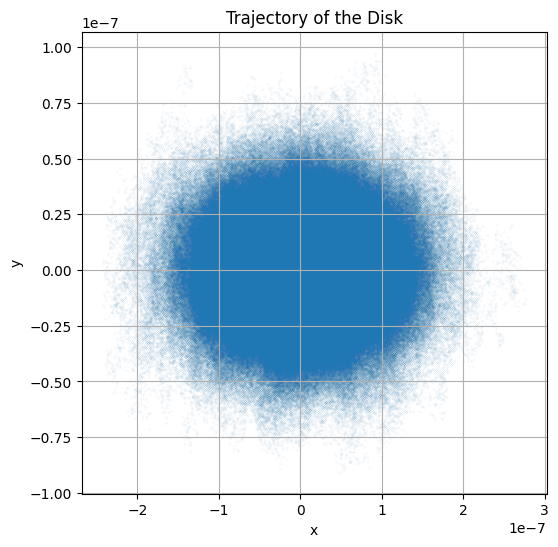

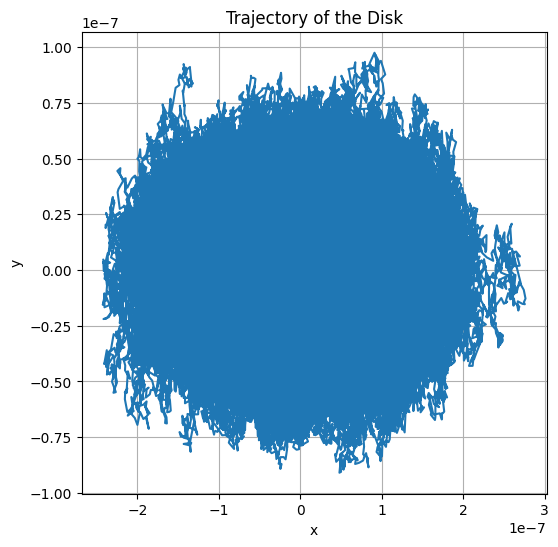

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.scatter(x, y, 0.001)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of the Disk")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of the Disk")
plt.grid(True)
plt.show()

##### **P2** - Plot the *probability distribution* of the positions in $x$ and in $y$ (two seperate histograms: one for x and one for y). Compare each case with the expected Boltzmann distribution.

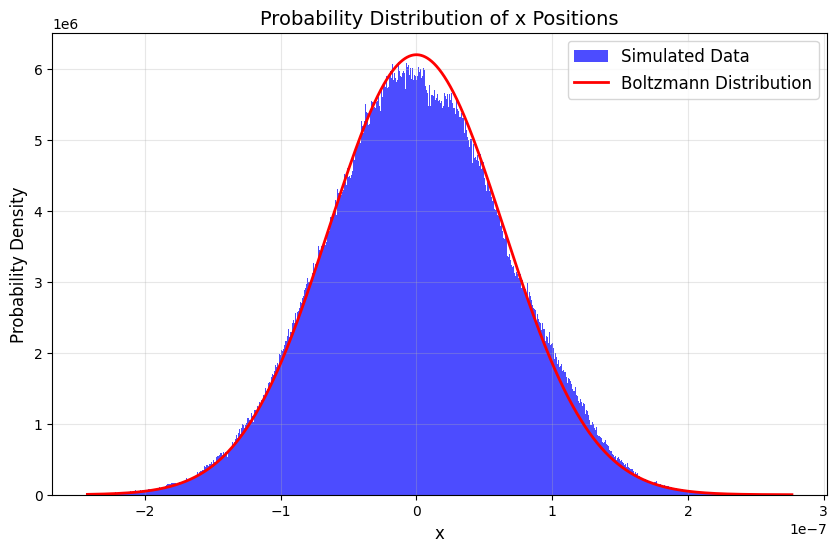

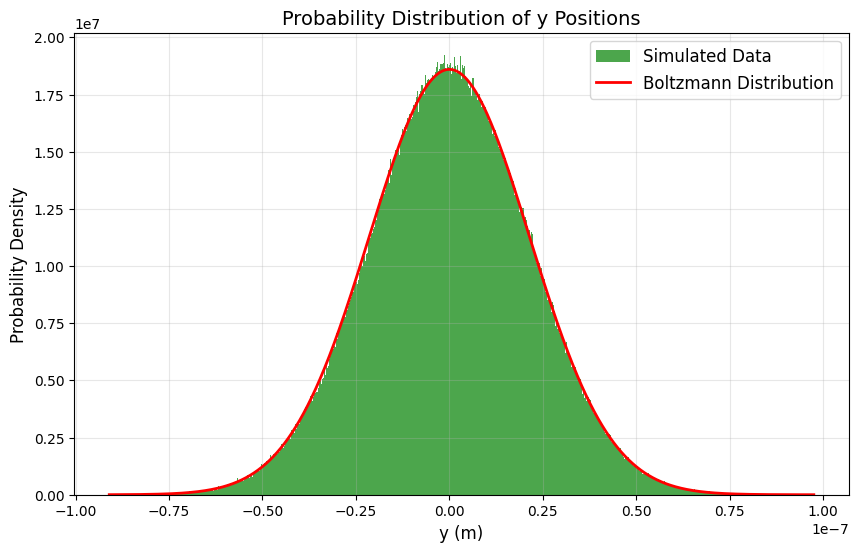

In [12]:
# Histogram for x positions this is normalized by density = True
plt.figure(figsize=(10, 6))
plt.hist(x, bins=1000, density=True, alpha=0.7, color='blue', label='Simulated Data')
plt.title('Probability Distribution of x Positions', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Boltzmann distribution
x_vals = np.linspace(min(x), max(x), 10000)
#sqrt part is normalization factor and exp is probability term
boltzmann_x = np.sqrt(k_x / (2 * np.pi * kBT * T)) * np.exp(-k_x * x_vals**2 / (2 * kBT * T))
plt.plot(x_vals, boltzmann_x, color='red', lw=2, label='Boltzmann Distribution')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()



# Histogram for y positions
plt.figure(figsize=(10, 6))
plt.hist(y, bins=1000, density=True, alpha=0.7, color='green', label='Simulated Data')
plt.title('Probability Distribution of y Positions', fontsize=14)
plt.xlabel('y (m)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Overlay the Boltzmann distribution for y
ky = 9e-6  # Stiffness in y (N/m)
y_vals = np.linspace(min(y), max(y), 10000)
boltzmann_y = np.sqrt(ky / (2 * np.pi * kBT * T)) * np.exp(-ky * y_vals**2 / (2 * kBT * T))
plt.plot(y_vals, boltzmann_y, color='red', lw=2, label='Boltzmann Distribution')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

##### **Q2** Calculate the *variance* of the $x$ and $y$ positions. Which one has the larger variance? Check and compare the theoretical value for the variance in a harmonic trap.

In [13]:
var_x_sim = np.mean(x**2)
var_y_sim = np.mean(y**2)

var_x_theoretical = kBT * T / k_x
var_y_theoretical = kBT * T / k_y

print("Simulated sigma_x^2 = ", var_x_sim, ", Theoretical sigma_x^2 = ", var_x_theoretical)

print("Simulated sigma_y^2 = ", var_y_sim, ", Theoretical sigma_y^2 = ", var_y_theoretical)

Simulated sigma_x^2 =  4.4248025628974435e-15 , Theoretical sigma_x^2 =  4.1399999999999994e-15
Simulated sigma_y^2 =  4.59532055796265e-16 , Theoretical sigma_y^2 =  4.599999999999999e-16


##### **P3** Calculate and plot the position autocorrelation function. Compare with the theoretical value for a harmonic trapping potential.

In [ ]:
import numba
import numpy as np

@numba.jit(nopython=True)  # JIT compilation for performance
def calculate_autocorrelation(x):
    N = len(x)
    autocorr = np.zeros(N)  # Initialize an array to store autocorrelations
    
    for n in range(N):
        if n % 100 == 0:
            print(n)
        
        c_1 = 1 / (N - n)
        summation = 0
        for i in range(0, N - n):
            summation += x[i + n] * x[i]
        autocorr[n] = c_1 * summation
    
    return autocorr

In [16]:
def theoretical_autocorrelation(t, k):
    gamma = 6 * np.pi * eta * R
    return (kBT * T / k) * np.exp(-k*t / gamma)

In [19]:
C_x_sim = calculate_autocorrelation(x)
C_y_sim = calculate_autocorrelation(y)

t = np.arange(0, duration, dt)
C_x_th = theoretical_autocorrelation(t, k_x)
C_y_th = theoretical_autocorrelation(t, k_y)


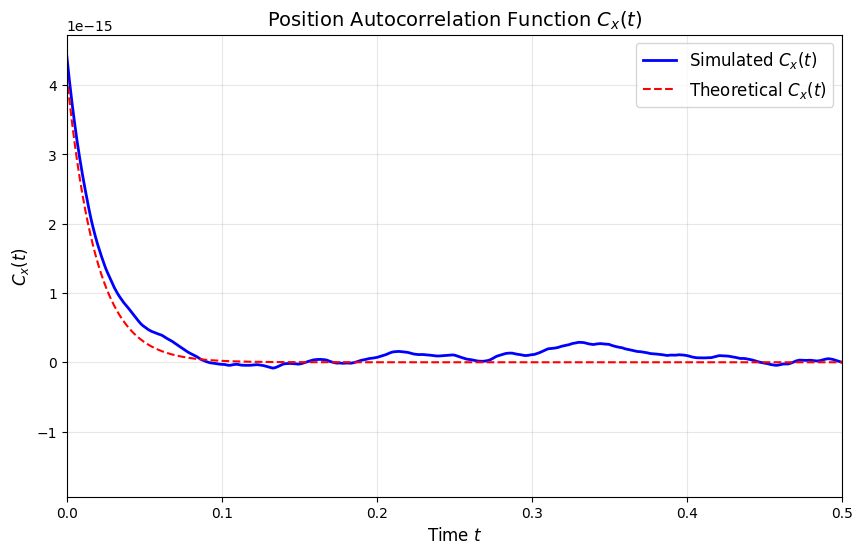

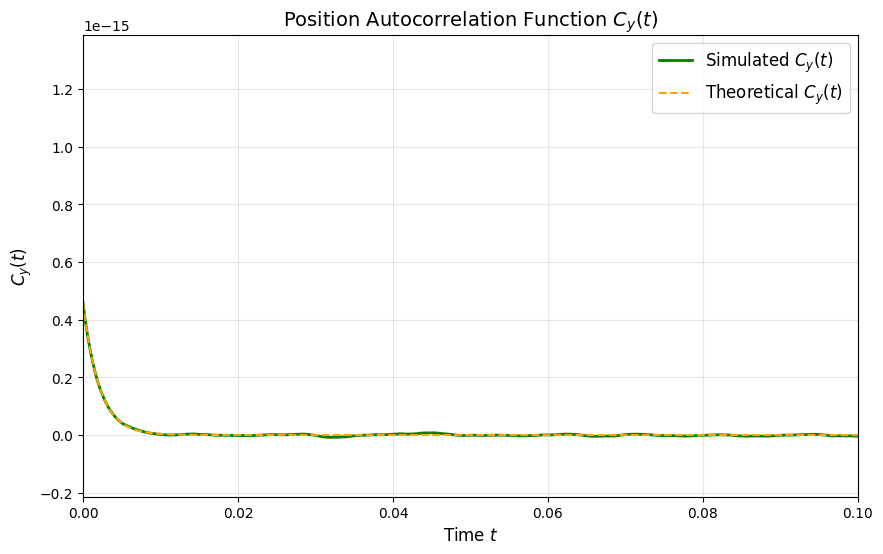

In [ ]:

# Plot the autocorrelatVion functions for x

plt.figure(figsize=(10, 6))
plt.plot(t, C_x_sim, label='Simulated $C_x(t)$', color='blue', lw=2)
plt.plot(t, C_x_th, label='Theoretical $C_x(t)$', color='red', linestyle='--')
plt.title('Position Autocorrelation Function $C_x(t)$', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$C_x(t)$', fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 0.5)  
plt.grid(alpha=0.3)
plt.show()

# Plot the autocorrelation functions for y
plt.figure(figsize=(10, 6))
plt.plot(t, C_y_sim, label='Simulated $C_y(t)$', color='green', lw=2)
plt.plot(t, C_y_th, label='Theoretical $C_y(t)$', color='orange', linestyle='--')
plt.title('Position Autocorrelation Function $C_y(t)$', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$C_y(t)$', fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 0.1) 
plt.grid(alpha=0.3)
plt.show()

#### **EXERCISE 2**



In [5]:
steps = 500
v = 1
alpha = 2

In [6]:
def levy_1d(steps, v, alpha):
    delta_t = np.random.uniform(0,1, steps)**(-1/(3-alpha))
    x = np.zeros(steps)
    t = np.cumsum(delta_t)
    x[0] = 0
    directions = np.random.choice([-1, 1], steps)
    for i in range(1, steps):
        x[i] = x[i-1] + directions[i-1]*v*delta_t[i]


    return t, x




In [7]:

def levy_2d(steps, v, alpha):
    delta_t = np.random.uniform(0,1, steps)**(-1/(3-alpha))
    x = np.zeros(steps)
    y = np.zeros(steps)
    angle = np.zeros(steps)
    t = np.cumsum(delta_t)

    x[0] = 0
    y[0] = 0
    angle[0] = 0
    directions = np.random.uniform(-np.pi,np.pi, steps)

    for i in range(1, steps):
        angle[i] = angle[i-1] + directions[i-1]
        x[i] = x[i-1] + v*np.cos(angle[i-1])*delta_t[i-1]
        y[i] = y[i-1] + v*np.sin(angle[i-1])*delta_t[i-1]


    return t, x, y

In [8]:

def regularize(x_nu, t_nu, t):
    """
    Function to regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.

    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        
        # Select the spots in x (wanted trajectory) to set.
        s_end = np.where(t < t_nu[i+1])[0][-1]                 

        # Assign the values of the segment.
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1]-t_nu[i]) 
        
        # Update the position in the wanted trajectory.
        s = s_end + 1                                           
        
    return x


#### **P1** - Generate five different LW trajectories in one dimension for $\alpha = 2$, v = 1. Plot them on the same plot.

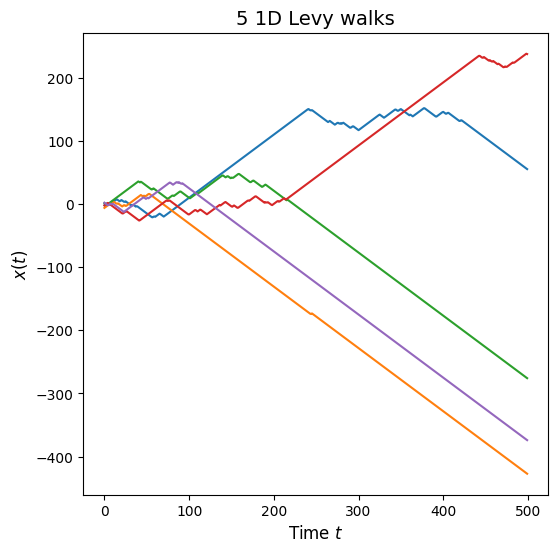

In [10]:
import matplotlib.pyplot as plt

walks = []
dt = 0.1
t = np.arange(0, steps)
for i in range(5):
    tau, x = levy_1d(steps, v, alpha)
    x_r = regularize(x, tau, t)
    walks.append(x_r)



plt.figure(figsize=(6, 6))
for walk in walks:
    plt.plot(t , walk)

plt.title('5 1D Levy walks', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$x(t)$', fontsize=12)
plt.show()

#### **P2** - Same in 2D

C:\Users\Viggo\AppData\Local\Temp\ipykernel_7924\1181166046.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


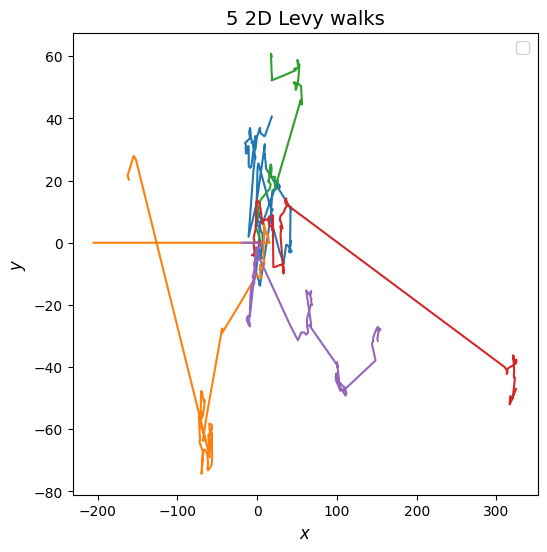

In [11]:
import numpy as np
import matplotlib.pyplot as plt

walks_x = []
walks_y = []
dt = 0.1
t = np.arange(0, steps)
for i in range(5):
    tau, x, y = levy_2d(steps, v, alpha)
    x_r = regularize(x, tau, t)
    y_r = regularize(y, tau, t)
    walks_x.append(x_r)
    walks_y.append(y_r)



plt.figure(figsize=(6, 6))
for i in range(5):
    plt.plot( walks_x[i], walks_y[i])

plt.title('5 2D Levy walks', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#### **P3** - Calculate and plot the eMSD and tMSD for the 1D LW with $\alpha=2$.

In [12]:

import math
import numpy as np 

def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

In [13]:

def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

In [38]:
alpha = 2

t_tot = 10000
steps = 10000
dt = 0.1

t_t = np.arange(int(np.ceil(t_tot / dt)))*dt
N_steps_t = np.size(t_t)

t_nu, x_t = levy_1d(steps, 1, alpha)
x_t_r = regularize(x_t, t_nu, t_t)


#----------------------------------
#Ensamble

t_tot = 100
steps = 100
dt = 0.1

t_e = np.arange(int(np.ceil(t_tot/dt))) * dt
N_steps_e = np.size(t_e)

N_traj = 1000

x_e = np.zeros([N_traj, N_steps_e])

for i in range(N_traj):
    t_nu, x = levy_1d(steps, 1, alpha)
    x_r = regularize(x, t_nu, t_e)
    x_e[i, :] = x_r

# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

# Calculate tMSD
tmsd = tMSD_1d(x_t, N_steps_e)  # tMSD from long trajectory.

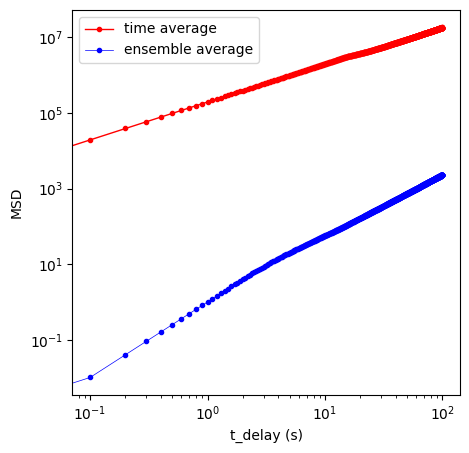

In [39]:
plt.figure(figsize=(5,5))
plt.loglog(t_e, tmsd, '.-', color='r', linewidth=1, 
         label='time average')
plt.loglog(t_e, emsd, '.-', color='b', linewidth=0.5, 
         label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

#### **TASK 3**

##### **P1** - Plot the dependence for the term s(x)



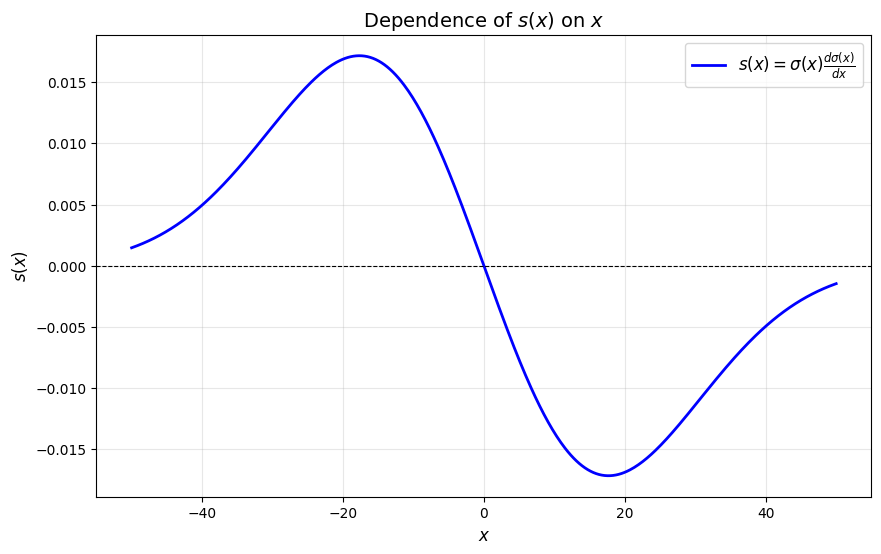

In [42]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time steps
t0 = 100  # Base value of the duration.

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.

w0 = 25
sigma0 = 1

x = np.linspace(-L/2, L/2, 500)

s_x = -x * (sigma0/w0)**2 * np.exp(-x**2 / w0**2)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, s_x, label='$s(x) = \\sigma(x) \\frac{d\\sigma(x)}{dx}$', color='blue', lw=2)
plt.title('Dependence of $s(x)$ on $x$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$s(x)$', fontsize=12)
plt.axhline(0, color='black', linestyle='--', lw=0.8)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

##### **P2** $\alpha = 0$

In [51]:

alpha = 0

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


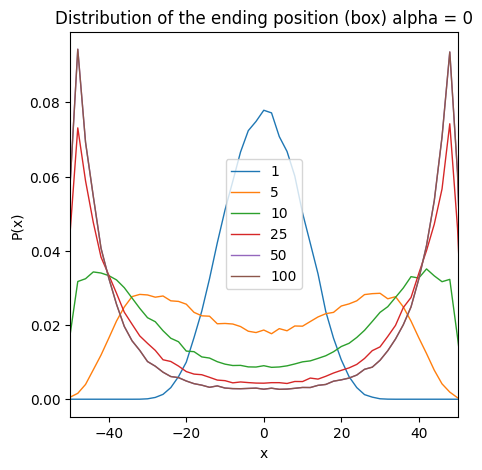

In [52]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 0')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

##### **P3** $\alpha = 0.5$

In [47]:
alpha = 0.5

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


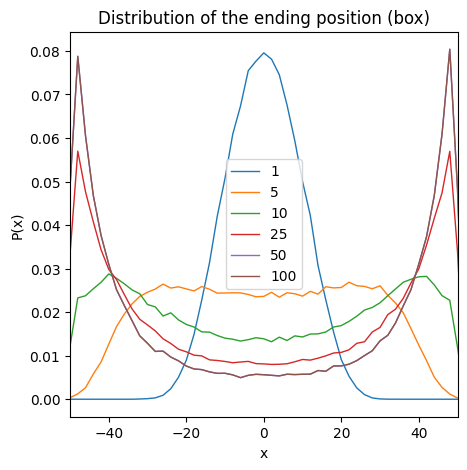

In [ ]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

##### **P4** $\alpha = 1$

In [49]:
alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


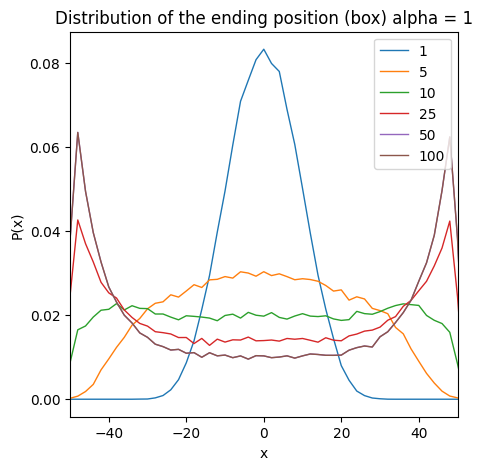

In [50]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

#### **Q1** - Comment your plots: are the distribution of the final points symmetrical? Why or why not?

Possible Explanations for Symmetry:

    Reflective Boundary Conditions:
        Reflective boundaries naturally enforce symmetry because any movement beyond the boundaries is reflected back, balancing any asymmetry over time.

    Choice of Parameters:
        The specific parameters (σ0σ0​, w0w0​, LL, etc.) may lead to a scenario where the noise-induced drift (s(x)s(x)) has a negligible net effect on the asymmetry.

    Long-Time Dynamics:
        Over long times, the particle explores the entire box, and the reflective boundaries enforce a uniform probability distribution, which appears symmetrical.

    Large Number of Trajectories:
        Simulating a large number of trajectories (e.g., 104104) can average out small asymmetries, leading to an apparently symmetrical distribution.